In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("sales_data_with_discounts (2).csv")

In [3]:
df.shape

(450, 13)

In [4]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [9]:
df.isnull().sum()

Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [13]:
df.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [15]:
np.mean(df[["Avg Price"]])

10453.433333333332

In [17]:
np.mean(df[["Total Sales Value"]])

33812.83555555555

In [19]:
np.mean(df[["Discount Rate (%)"]])

15.155241895330914

In [21]:
np.mean(df[["Discount Amount"]])

3346.499424342415

In [23]:
np.mean(df[["Volume"]])

5.066666666666666

In [25]:
np.mean(df[["Net Sales Value"]])

30466.336131270138

In [27]:
np.median(df[["Avg Price"]])


1450.0

In [29]:
np.median(df[["Total Sales Value"]])

5700.0

In [31]:
np.median(df[["Discount Rate (%)"]])

16.57776564929597

In [33]:
np.median(df[["Discount Amount"]])

988.9337332382784

In [35]:
np.median(df[["Net Sales Value"]])

4677.788059301853

In [37]:
np.median(df[["Volume"]])

4.0

In [39]:
df['Avg Price'].mode()

0     400
1     450
2     500
3    1300
4    8100
Name: Avg Price, dtype: int64

In [41]:
df['Total Sales Value'].mode()

0    24300
Name: Total Sales Value, dtype: int64

In [43]:
df["Discount Rate (%)"].mode()

0       5.007822
1       5.055218
2       5.059801
3       5.072124
4       5.084108
         ...    
445    19.940610
446    19.965340
447    19.976879
448    19.982257
449    19.992407
Name: Discount Rate (%), Length: 450, dtype: float64

In [45]:
df["Discount Amount"].mode()

0         69.177942
1         73.025199
2         93.649161
3         94.682735
4        102.705757
           ...     
445    17900.983733
446    21153.498820
447    21496.675367
448    25328.224204
449    25738.022194
Name: Discount Amount, Length: 450, dtype: float64

In [47]:
df["Net Sales Value"].mode()


0         326.974801
1         330.822058
2         466.350839
3         485.317265
4         496.607104
           ...      
445    162603.186379
446    163915.971000
447    163967.080070
448    166263.161348
449    179507.479049
Name: Net Sales Value, Length: 450, dtype: float64

In [49]:
df["Volume"].mode()

0    3
Name: Volume, dtype: int64

In [51]:
np.std(df['Avg Price'])

18059.80488392815

In [53]:
np.std(df['Total Sales Value'])

50478.89286094034

In [55]:
np.std(df['Discount Rate (%)'])

4.215909987168584

In [57]:
np.std(df['Discount Amount'])

4504.88917307315

In [59]:
np.std(df['Net Sales Value'])

46307.11835730076

In [61]:
np.std(df['Volume'])

4.226897995772632

In [63]:
##### Data visulaization ####

In [65]:
c=df.select_dtypes(['int','float']).columns

In [67]:
c

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

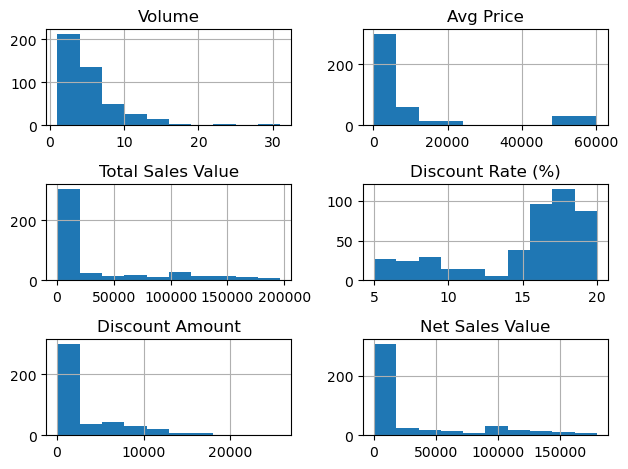

In [69]:
df.hist()
plt.tight_layout()

<Axes: ylabel='Density'>

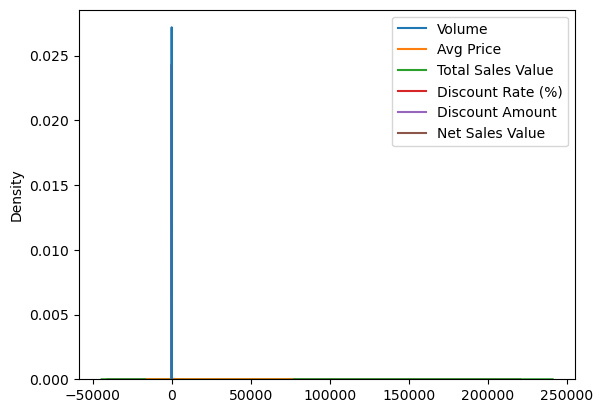

In [70]:
sns.kdeplot(data=df)

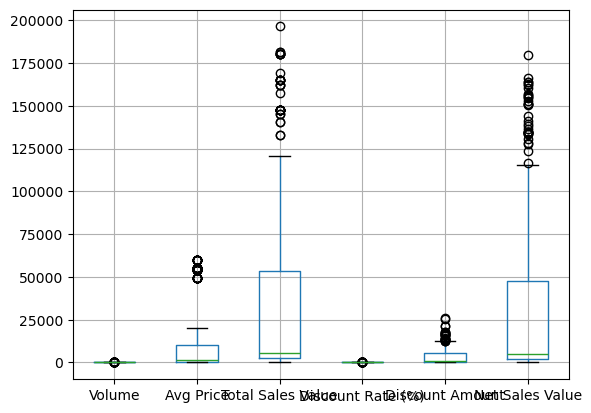

In [72]:
df.boxplot()
plt.show()

In [75]:
##### Removing Outliers ####

In [77]:
def outlier_capping(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)
  iqr= q3-q1
  lower_extreme= q1-1.5*iqr
  upper_extreme= q3+1.5*iqr
  df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
  outlier_capping(df,col)

<Axes: >

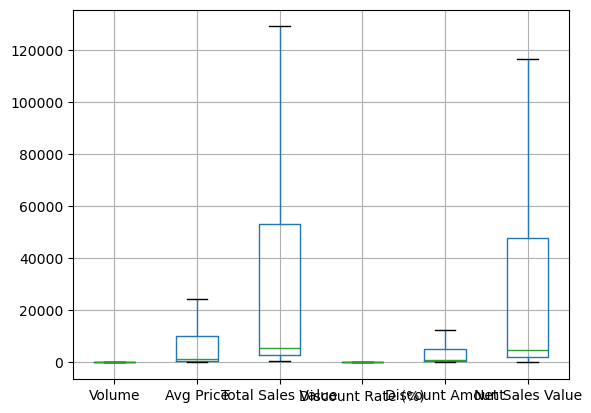

In [79]:
df.boxplot()


In [81]:
bar=df.select_dtypes('object').columns
bar

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

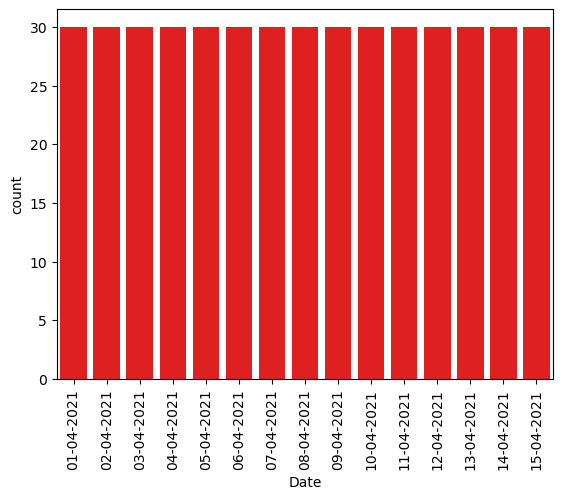

In [83]:
sns.countplot(data=df,x='Date',color='red')
plt.xticks(rotation=90)
plt.show()

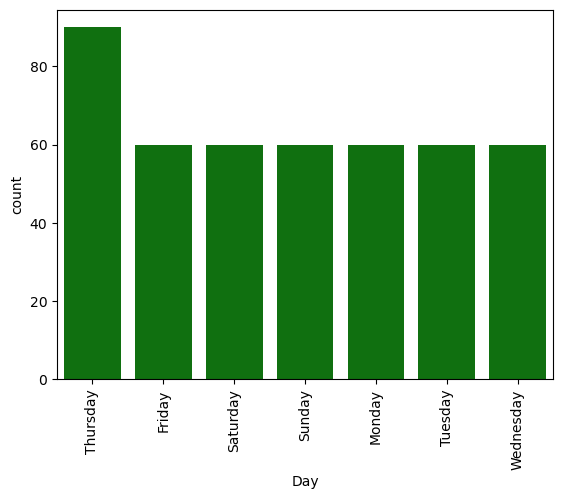

In [85]:
sns.countplot(data=df,x='Day',color='green')
plt.xticks(rotation=90)
plt.show()

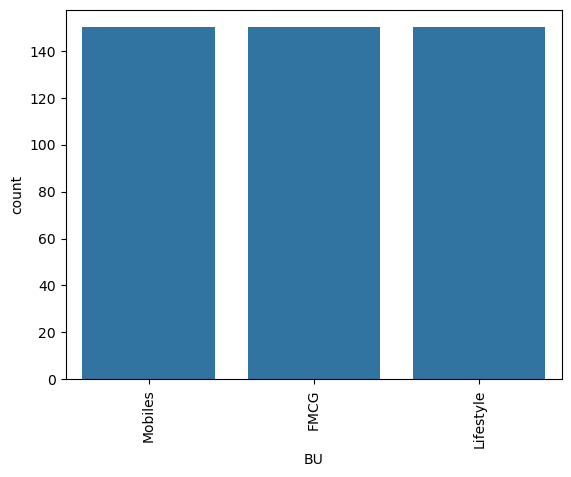

In [87]:
 sns.countplot(data=df,x='BU')
plt.xticks(rotation=90)
plt.show()

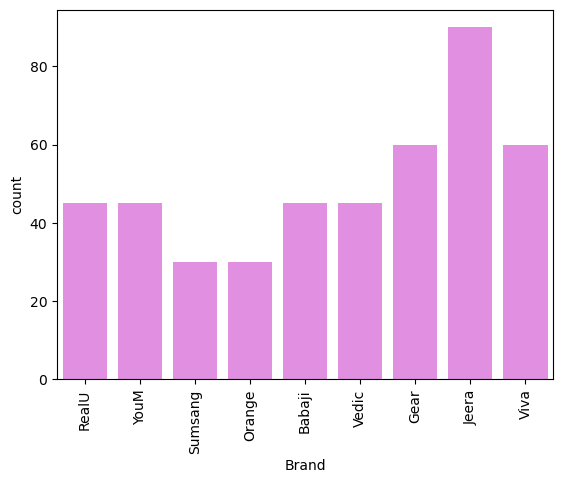

In [89]:
sns.countplot(data=df,x='Brand',color='violet')
plt.xticks(rotation=90)
plt.show()

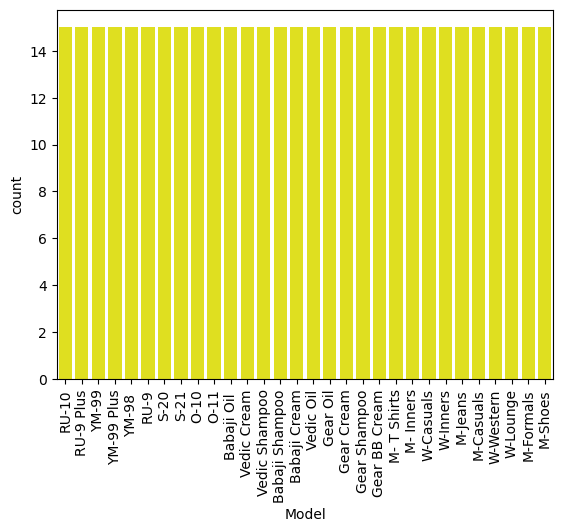

In [91]:
sns.countplot(data=df,x='Model',color='yellow')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='City', ylabel='count'>

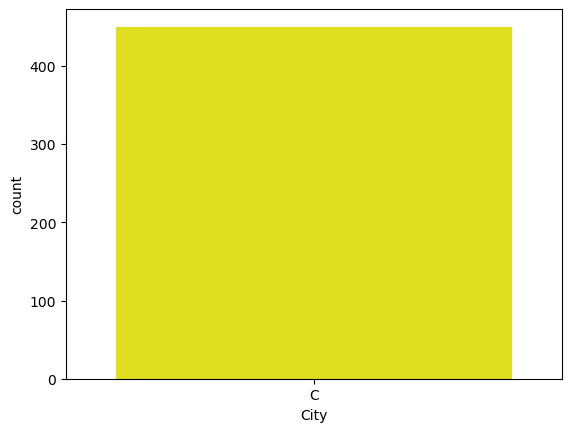

In [92]:
sns.countplot(data=df,x='City',color='yellow')

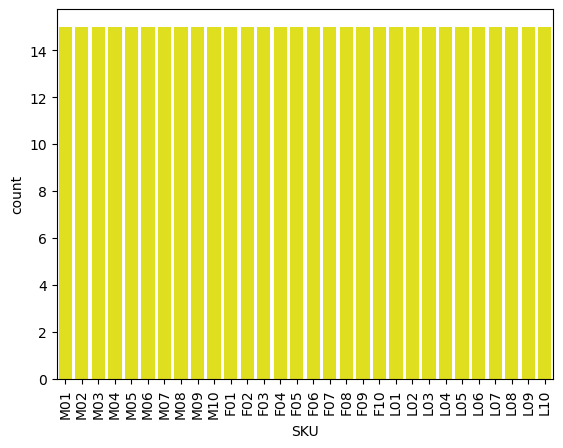

In [95]:
sns.countplot(data=df,x='SKU',color='yellow')
plt.xticks(rotation=90)
plt.show()